# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
import json
import citipy as citipy
from citipy import citipy
import scipy.stats as st
from datetime import datetime

from api_keys import (weather_api_key, g_key)

## Generate Cities List

In [15]:
# make tuples of lat and longitude range
lat_range = (-90, 90)
lng_range = (-180, 180)

# make empty lists
lat_lngs = []
cities = []

# create a set of random lat and longitudes 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# combine lats and longitudes
lat_lngs = zip(lats, lngs)

# Find closest city to lat and longitudes using citipy
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# Only add city if not already in cities list
    if city not in cities:
        cities.append(city)

# print the length of cities to make sure there is more than 500
len(cities)

#type(cities)
#print(cities)

list

In [4]:
type(lat_range)

tuple

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# https://openweathermap.org/current for api calling documentatiun

# start counter at 0
counter = 0
# create an empty list to append to
city_data = []

# Sets were only used as the maximum data that could be retrieved from the weather api is 50 per minute according to documentation. 
# This has been ignored as more requests than a 50 requests per minute can be made

print("Begining Data Retrieval")
print("-----------------------------------")

#loop through cities list
for city in cities:
    
    # set url and units for cities search
    units = "metric"
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    #use try and except to append city_data or respond with nothing found
    try:
        # add to counter each city
        counter = counter + 1
        
        # get json from query request of city
        city_weather = requests.get(query_url).json()
        
        # pull out data from request json
        name = city_weather["name"]
        latitude = city_weather["coord"]["lat"]
        longitude = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]
        
        # append city data found to empty city_data list
        city_data.append({"City": name,
                            "Latitude": latitude,
                            "Longitude": longitude,
                            "Max Temp": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": clouds,
                            "Wind Speed": wind,
                            "Country": country,
                            "Date": date 
                         })
        
        print(f"Processing record {counter} | {name}" )
        
    except Exception: 
        counter = counter - 1
        print("City not found. Skipping...")
        
print("############# Completed #############")  
records = len(city_data)
print(f"{records} cities were processed")

Begining Data Retrieval
-----------------------------------
Processing record 1 | Oranjemund
Processing record 2 | Yellowknife
Processing record 3 | Wanning
Processing record 4 | Busselton
Processing record 5 | Rikitea
Processing record 6 | Mandalgovi
Processing record 7 | Castro
City not found. Skipping...
Processing record 8 | Mataura
Processing record 9 | Romny
Processing record 10 | Ushuaia
Processing record 11 | Barrow
Processing record 12 | Manmād
Processing record 13 | Hermanus
Processing record 14 | Manggar
Processing record 15 | Tiksi
Processing record 16 | Tuktoyaktuk
Processing record 17 | Katsuura
Processing record 18 | Preslav
City not found. Skipping...
Processing record 19 | Novoagansk
Processing record 20 | Clyde River
City not found. Skipping...
Processing record 21 | Vaini
Processing record 22 | Pisco
Processing record 23 | Bredasdorp
Processing record 24 | São Gabriel da Cachoeira
Processing record 25 | Husavik
Processing record 26 | Jamestown
Processing record 27 | 

Processing record 225 | Upernavik
Processing record 226 | Sullia
City not found. Skipping...
Processing record 227 | Port Macquarie
Processing record 228 | Comodoro Rivadavia
Processing record 229 | Hong Kong
Processing record 230 | Vao
Processing record 231 | Raudeberg
Processing record 232 | Piquete
Processing record 233 | Dunmore East
Processing record 234 | Rehoboth
Processing record 235 | Baker City
Processing record 236 | Musāfir-Khāna
Processing record 237 | Moville
Processing record 238 | Sur
Processing record 239 | Pangkalanbuun
Processing record 240 | Severnyy
Processing record 241 | Norman Wells
Processing record 242 | Kiryat Gat
Processing record 243 | Peleduy
Processing record 244 | Vostok
Processing record 245 | Alcañiz
Processing record 246 | Scarborough
Processing record 247 | Viedma
Processing record 248 | Praia da Vitória
Processing record 249 | Havelock
City not found. Skipping...
City not found. Skipping...
Processing record 250 | Saint-François
Processing record 25

Processing record 456 | Malartic
Processing record 457 | Byron Bay
Processing record 458 | Petropavlovsk-Kamchatskiy
Processing record 459 | Çay
Processing record 460 | Mahibadhoo
Processing record 461 | Iranshahr
Processing record 462 | Minzhu
Processing record 463 | Bonthe
Processing record 464 | Pag
Processing record 465 | Preobrazheniye
Processing record 466 | Acapulco de Juárez
Processing record 467 | Atambua
Processing record 468 | Chumikan
Processing record 469 | Aban
Processing record 470 | Kyrksæterøra
Processing record 471 | São Geraldo do Araguaia
Processing record 472 | Nizhniy Kuranakh
Processing record 473 | Cabedelo
Processing record 474 | Nantucket
Processing record 475 | Narsaq
Processing record 476 | Jalu
Processing record 477 | Ixtapa
Processing record 478 | Flin Flon
Processing record 479 | Longhua
Processing record 480 | Asău
Processing record 481 | Bud
Processing record 482 | Arawa
Processing record 483 | Muros
Processing record 484 | Port Augusta
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# convert to a dataframe and display
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oranjemund,-28.5500,16.4333,18.82,86,13,2.52,NA,1610593174
1,Yellowknife,62.4560,-114.3525,-11.00,92,75,4.12,CA,1610593022
2,Wanning,18.8003,110.3967,19.36,64,55,3.91,CN,1610593175
3,Busselton,-33.6500,115.3333,21.11,46,100,1.79,AU,1610593176
4,Rikitea,-23.1203,-134.9692,25.51,77,71,5.19,PF,1610593178
...,...,...,...,...,...,...,...,...,...
543,Tahe,52.3333,124.7333,-22.85,82,9,1.16,CN,1610593680
544,Gōtsuchō,35.0000,132.2167,12.00,62,20,3.09,JP,1610593681
545,Shahrud,36.4182,54.9763,2.17,71,0,1.96,IR,1610593442
546,Awjilah,29.1081,21.2869,12.23,60,65,7.83,LY,1610593683


In [24]:
# output data to csv in output_data folder with no index
output = city_data_df.to_csv("../output_data/city_data.csv", index = False)

In [25]:
# descrcibe data for insight
city_data_df.describe().round(2)

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.00,548.00,548.00,548.00,548.00,548.00,5.480000e+02
mean,20.49,15.76,9.07,75.93,54.89,3.38,1.610593e+09
std,33.18,90.14,17.77,18.49,40.74,2.50,1.749400e+02
min,-54.80,-179.17,-43.39,1.00,0.00,0.13,1.610593e+09
25%,-6.91,-63.01,-1.11,69.00,6.00,1.54,1.610593e+09
50%,25.35,23.87,14.35,81.00,70.50,2.84,1.610593e+09
75%,48.69,92.92,23.27,88.00,96.00,4.64,1.610594e+09
max,78.22,179.32,38.00,100.00,100.00,20.58,1.610594e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
# find the highest humidity and check that is 100% or below
print(max(city_data_df["Humidity"]))

100


In [27]:
# find rows with humidity over 100
humidity100 = city_data_df.loc[city_data_df["Humidity"] > 100]
humidity100

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [28]:
#  Get the indices of cities that have humidity over 100%.
humidity100_index = humidity100.index
humidity100_index

Int64Index([], dtype='int64')

In [29]:
clean_city_data = pd.DataFrame(city_data)

In [14]:
# There is no humidity over 100% found. Skipping....

In [30]:
city_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,20.489087,15.762356,9.070182,75.934307,54.890511,3.382080,1.610593e+09
std,33.178546,90.143355,17.770939,18.488775,40.739181,2.495745,1.749410e+02
min,-54.800000,-179.166700,-43.390000,1.000000,0.000000,0.130000,1.610593e+09
25%,-6.908575,-63.011975,-1.110000,69.000000,6.000000,1.540000,1.610593e+09
50%,25.351700,23.870100,14.350000,81.000000,70.500000,2.840000,1.610593e+09
75%,48.690550,92.925000,23.270000,88.000000,96.000000,4.637500,1.610594e+09
max,78.218600,179.316700,38.000000,100.000000,100.000000,20.580000,1.610594e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

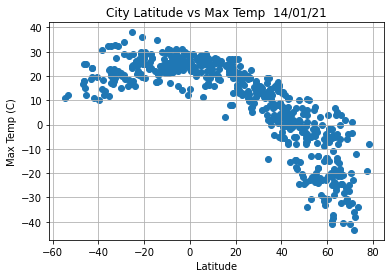

In [31]:
# Convert POSIX timestamp to formatted date
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
city_date = datetime.fromtimestamp(clean_city_data["Date"].min()).strftime('%d/%m/%y')

x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Max Temp"]

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"City Latitude vs Max Temp  {city_date}")
plt.grid()
#plt.show()

plt.savefig("../output_data/City Latitude vs Max Temp.png")

## Latitude vs. Humidity Plot

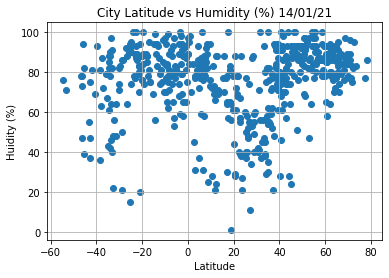

In [32]:
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Humidity"]

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Huidity (%)")
plt.title(f"City Latitude vs Humidity (%) {city_date}")
plt.grid()
plt.savefig("../output_data/City Latitude vs Humidity (%)")

## Latitude vs. Cloudiness Plot

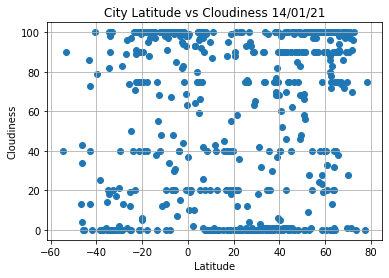

In [33]:
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Cloudiness"]

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness {city_date}")
plt.grid()
plt.savefig("../output_data/City Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

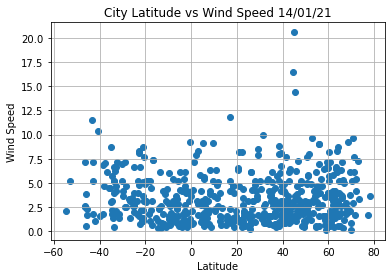

In [34]:
x_values = clean_city_data["Latitude"]
y_values = clean_city_data["Wind Speed"]

plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed {city_date}")
plt.grid()
plt.savefig("../output_data/City Latitude vs Wind Speed")

## Linear Regression

In [57]:
# create northern and southern hemisphere cuts of data
northern_hemi = clean_city_data.loc[(clean_city_data["Latitude"]) > 0]
len_northern = len(northern_hemi)

southern_hemi = clean_city_data.loc[(clean_city_data["Latitude"]) < 0]
len_sothern = len(southern_hemi)

print(f"There are {len_northern} cities in the northern hemisphere")
print(f"There are {len_sothern} cities in the southern hemisphere")

There are 373 cities in the northern hemisphere
There are 175 cities in the southern hemisphere


In [59]:
southern_hemi["Max Temp"].describe()

count    175.000000
mean      23.484971
std        5.236626
min       10.000000
25%       20.495000
50%       23.800000
75%       27.180000
max       38.000000
Name: Max Temp, dtype: float64

In [61]:
northern_hemi["Max Temp"].describe()

count    373.000000
mean       2.307212
std       17.548075
min      -43.390000
25%       -7.260000
50%        4.000000
75%       16.110000
max       29.000000
Name: Max Temp, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.728


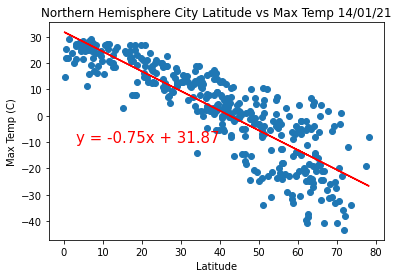

In [36]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
print(f"The r-value is: {(rvalue**2).round(3)}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (3,-10), fontsize=15, color="Red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"Northern Hemisphere City Latitude vs Max Temp {city_date}")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.164


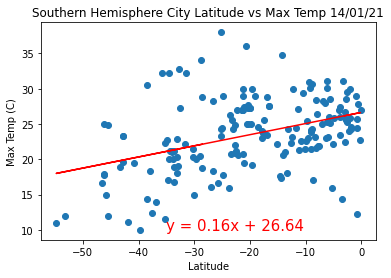

In [37]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlartion_calculation = st.pearsonr(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
print(f"The r-value is: {(rvalue**2).round(3)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-35,10), fontsize=15, color="Red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title(f"Southern Hemisphere City Latitude vs Max Temp {city_date}")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.126


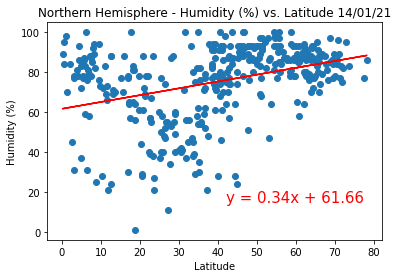

In [49]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
print(f"The r-value is: {(rvalue**2).round(3)}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (42,15), fontsize=15, color="Red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude {city_date}")
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs Latitude")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.086


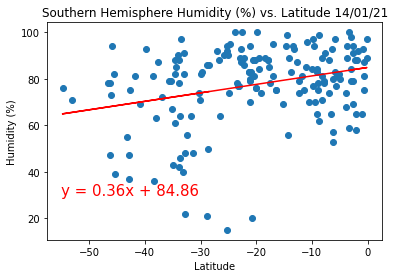

In [50]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlartion_calculation = st.pearsonr(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
print(f"The r-value is: {(rvalue**2).round(3)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,30), fontsize=15, color="Red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere Humidity (%) vs. Latitude {city_date}")
plt.savefig("../output_data/Southern Hemisphere Humidity (%) vs Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.068


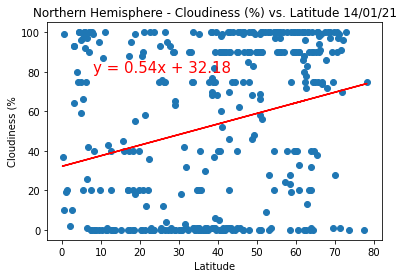

In [54]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
print(f"The r-value is: {(rvalue**2).round(3)}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (8,80), fontsize=15, color="Red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude {city_date}")
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.149


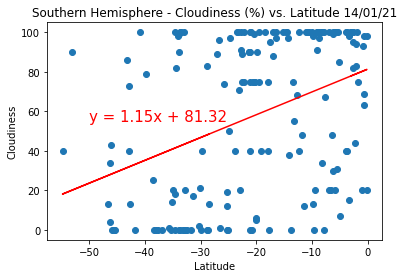

In [55]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlartion_calculation = st.pearsonr(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
print(f"The r-value is: {(rvalue**2).round(3)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,55), fontsize=15, color="Red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude {city_date}")
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0127


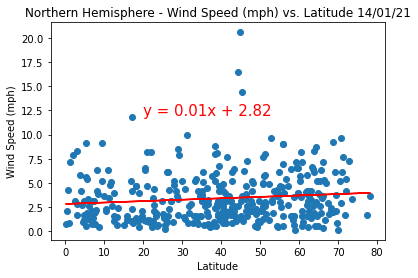

In [45]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
print(f"The r-value is: {(rvalue**2).round(4)}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,12), fontsize=15, color="Red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude {city_date}")
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08


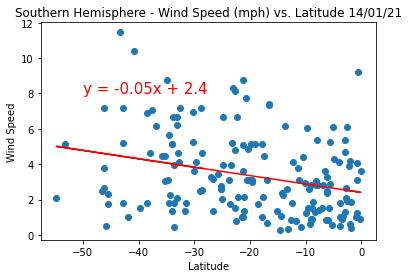

In [47]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlartion_calculation = st.pearsonr(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)
print(f"The r-value is: {(rvalue**2).round(3)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,8), fontsize=15, color="Red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude {city_date}")
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs Latitude")